In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/mcdonalds.csv')
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [3]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [4]:
df.shape

(1453, 15)

In [5]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [6]:
# Select columns 1 to 11
MD_x = df.iloc[:, 0:11]

# Convert "Yes" to 1 and everything else to 0
MD_x = (MD_x == "Yes").astype(int)

# Calculate column means and round to 2 decimal places
col_means = MD_x.mean().round(2)

print(col_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [7]:

from sklearn.decomposition import PCA

# Assuming MD_x is your data
# MD_x = ...

# Perform PCA
pca = PCA()
pca.fit(MD_x)

# Get principal components
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Standard deviation
standard_deviation = np.sqrt(explained_variance)

# Proportion of Variance
proportion_of_variance = explained_variance_ratio

# Cumulative Proportion
cumulative_proportion = cumulative_variance_ratio

# Create a DataFrame to display the results
components = {
    'Standard deviation': standard_deviation,
    'Proportion of Variance': proportion_of_variance,
    'Cumulative Proportion': cumulative_proportion
}

df_components = pd.DataFrame(components)
print(df_components)


    Standard deviation  Proportion of Variance  Cumulative Proportion
0             0.757050                0.299447               0.299447
1             0.607456                0.192797               0.492244
2             0.504619                0.133045               0.625290
3             0.398799                0.083096               0.708386
4             0.337405                0.059481               0.767866
5             0.310275                0.050300               0.818166
6             0.289697                0.043849               0.862015
7             0.275122                0.039548               0.901563
8             0.265251                0.036761               0.938323
9             0.248842                0.032353               0.970677
10            0.236903                0.029323               1.000000


In [8]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# Assuming MD_x is your data
# MD_x = ...

# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Extract principal components, explained variance, and explained variance ratio
components = pca.components_
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_

# Create DataFrames with one decimal place
components_df = pd.DataFrame(np.round(components, 1), columns=[f'PC{i+1}' for i in range(components.shape[0])])
explained_variance_df = pd.DataFrame({'Standard deviation': np.round(np.sqrt(explained_variance), 1)},
                                     index=[f'PC{i+1}' for i in range(len(explained_variance))])
explained_variance_ratio_df = pd.DataFrame({'Proportion of Variance': np.round(explained_variance_ratio, 1),
                                           'Cumulative Proportion': np.round(np.cumsum(explained_variance_ratio), 1)},
                                           index=[f'PC{i+1}' for i in range(len(explained_variance_ratio))])

# Print results
print("Principal Components:")
print(components_df)
print("\nStandard Deviation:")
print(explained_variance_df)
print("\nProportion of Variance and Cumulative Proportion:")
print(explained_variance_ratio_df)


Principal Components:
    PC1  PC2  PC3  PC4  PC5  PC6  PC7  PC8  PC9  PC10  PC11
0  -0.5 -0.2 -0.0  0.1  0.3 -0.1 -0.3 -0.5  0.3  -0.2   0.4
1   0.4  0.0  0.0 -0.0 -0.1 -0.1 -0.6  0.3  0.6   0.1  -0.1
2  -0.3 -0.1 -0.0 -0.3 -0.8 -0.1 -0.1 -0.3  0.0   0.2  -0.1
3   0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.0  0.1   0.8   0.4
4  -0.3  0.3  0.1 -0.1  0.4  0.1 -0.1 -0.2 -0.0   0.3  -0.7
5   0.2 -0.3 -0.4 -0.4  0.2 -0.6 -0.1 -0.1 -0.3  -0.2  -0.2
6  -0.3 -0.1  0.7 -0.4  0.0 -0.1 -0.0  0.4 -0.1  -0.3  -0.0
7   0.0 -0.1  0.4  0.6 -0.1 -0.6  0.1 -0.1  0.0   0.2  -0.2
8   0.6 -0.0  0.4 -0.2 -0.0  0.2  0.1 -0.6  0.1  -0.2  -0.1
9  -0.1 -0.7 -0.1 -0.0  0.0  0.2  0.4  0.1  0.5  -0.0  -0.3
10  0.0 -0.5  0.1  0.3  0.0  0.3 -0.5  0.0 -0.5   0.2  -0.0

Standard Deviation:
      Standard deviation
PC1                  0.8
PC2                  0.6
PC3                  0.5
PC4                  0.4
PC5                  0.3
PC6                  0.3
PC7                  0.3
PC8                  0.3
PC9         

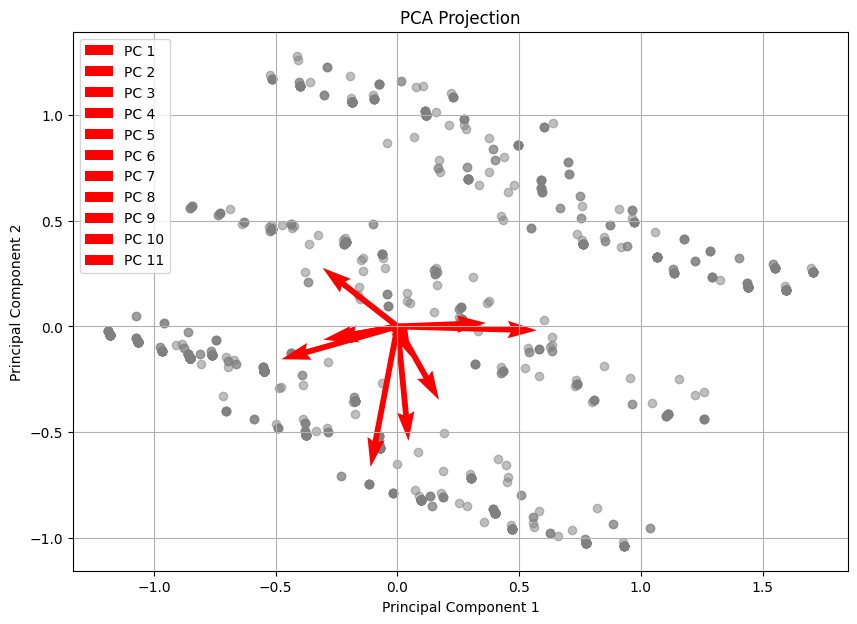

In [9]:
# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Plot the PCA-transformed data
plt.figure(figsize=(10, 7))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey', alpha=0.5)
plt.title('PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add projection axes
origin = np.zeros((2,))  # origin for the axes
for i in range(pca.components_.shape[0]):
    plt.quiver(*origin, *pca.components_[i, :2], color='red', angles='xy', scale_units='xy', scale=1, label=f'PC {i+1}')

plt.legend()
plt.grid(True)
plt.show()


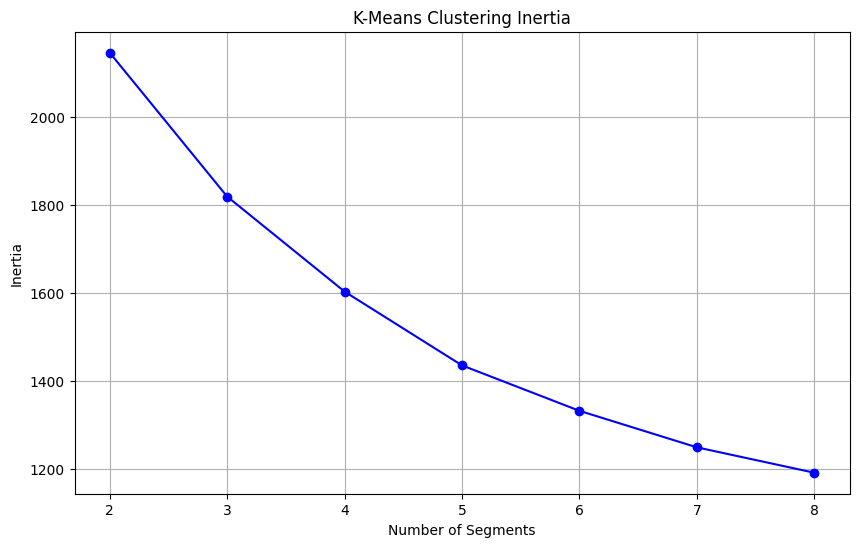

In [10]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Select the first 11 columns
MD_x = df.iloc[:, 0:11]

# Convert "Yes" to 1 and everything else to 0
MD_x = (MD_x == "Yes").astype(int)

# Function to run k-means clustering with multiple random restarts and return inertia
def calculate_inertia(X, min_clusters, max_clusters, n_restarts=10):
    inertias = []
    for n_clusters in range(min_clusters, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, n_init=n_restarts, random_state=1234)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)
    return inertias

# Calculate inertia for 2 to 8 clusters
inertias = calculate_inertia(MD_x, 2, 8)

# Plotting the inertia values
plt.figure(figsize=(10, 6))
plt.plot(range(2, 9), inertias, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Segments")
plt.ylabel("Inertia")
plt.title("K-Means Clustering Inertia")
plt.xticks(range(2, 9))
plt.grid(True)
plt.show()


In [11]:
from sklearn.metrics import pairwise_distances_argmin_min

def relabel_clusters(kmeans_results):
    relabeled_results = {}
    for n_clusters, kmeans in kmeans_results.items():
        labels = kmeans.labels_
        relabeled_results[n_clusters] = labels
    return relabeled_results

# Perform k-means clustering for 2 to 8 clusters and store results
kmeans_results = {n: KMeans(n_clusters=n, n_init=10, random_state=1234).fit(MD_x) for n in range(2, 9)}

# Relabel clusters
relabelled_results = relabel_clusters(kmeans_results)

# Print relabeled results (for inspection)
for n_clusters, labels in relabelled_results.items():
    print(f"Cluster labels for {n_clusters} clusters:")
    print(labels)


Cluster labels for 2 clusters:
[1 0 0 ... 0 0 1]
Cluster labels for 3 clusters:
[2 1 1 ... 1 0 2]
Cluster labels for 4 clusters:
[0 3 3 ... 3 2 1]
Cluster labels for 5 clusters:
[4 1 2 ... 2 3 0]
Cluster labels for 6 clusters:
[5 2 0 ... 0 1 3]
Cluster labels for 7 clusters:
[4 0 3 ... 3 6 1]
Cluster labels for 8 clusters:
[1 0 0 ... 5 2 3]


In [12]:
def calculate_stability(X, n_clusters, n_restarts=10):
    clusterings = []
    for _ in range(n_restarts):
        kmeans = KMeans(n_clusters=n_clusters, n_init=1, random_state=None)
        kmeans.fit(X)
        clusterings.append(kmeans.labels_)
    return clusterings

def measure_stability(clusterings):
    # Compare cluster assignments across runs
    stability = []
    for labels in zip(*clusterings):
        _, counts = np.unique(labels, return_counts=True)
        stability.append(counts.max())
    return np.mean(stability)

# Calculate stability for 2 to 8 clusters
stability_results = {}
for n_clusters in range(2, 9):
    clusterings = calculate_stability(MD_x, n_clusters, n_restarts=10)
    stability = measure_stability(clusterings)
    stability_results[n_clusters] = stability

# Print stability results
print("Stability of clusterings for each number of clusters:")
for n_clusters, stability in stability_results.items():
    print(f"{n_clusters} clusters: Stability = {stability}")


Stability of clusterings for each number of clusters:
2 clusters: Stability = 6.976600137646249
3 clusters: Stability = 5.293186510667584
4 clusters: Stability = 4.617343427391604
5 clusters: Stability = 3.35237439779766
6 clusters: Stability = 3.3551273227804543
7 clusters: Stability = 3.2202339986235375
8 clusters: Stability = 3.271851342050929


In [13]:
from sklearn.utils import resample
# Select the first 11 columns
MD_x = df.iloc[:, 0:11]

# Convert "Yes" to 1 and everything else to 0
MD_x = (MD_x == "Yes").astype(int)

# Function to generate bootstrap samples
def generate_bootstrap_samples(X, n_bootstrap):
    return [resample(X, replace=True, random_state=i) for i in range(n_bootstrap)]

# Generate 100 bootstrap samples
bootstrap_samples = generate_bootstrap_samples(MD_x, n_bootstrap=100)


In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Function to run k-means and return labels
def run_kmeans(X, n_clusters, n_restarts=10):
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_restarts, random_state=1234)
    return kmeans.fit_predict(X)

# Function to get clustering labels for each bootstrap sample
def get_bootstrap_clusterings(samples, n_clusters, n_restarts=10):
    return [run_kmeans(sample, n_clusters, n_restarts) for sample in samples]

# Store results for each number of clusters
clusterings = {n_clusters: [] for n_clusters in range(2, 9)}

for n_clusters in clusterings.keys():
    for sample in bootstrap_samples:
        labels = run_kmeans(sample, n_clusters, n_restarts=10)
        clusterings[n_clusters].append(labels)

In [15]:
from sklearn.metrics import adjusted_rand_score

def calculate_stability(clusterings):
    stability_scores = []
    for n_clusters, labels_list in clusterings.items():
        scores = []
        for i, labels1 in enumerate(labels_list):
            for labels2 in labels_list[i + 1:]:
                score = adjusted_rand_score(labels1, labels2)
                scores.append(score)
        stability_scores.append(np.mean(scores))
    return stability_scores

# Calculate stability scores
stability_scores = calculate_stability(clusterings)


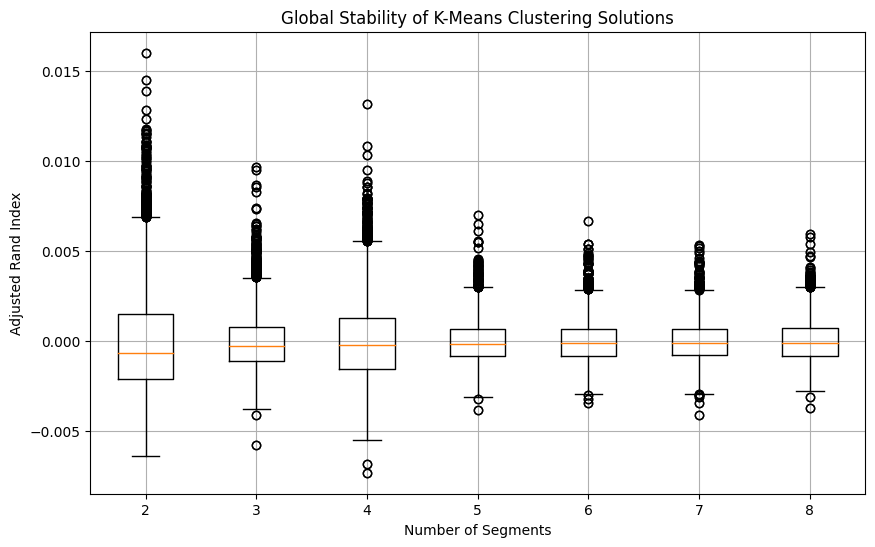

In [16]:
import matplotlib.pyplot as plt

# Convert stability scores to a format suitable for boxplot
def prepare_boxplot_data(clusterings):
    boxplot_data = {n_clusters: [] for n_clusters in range(2, 9)}
    for n_clusters, labels_list in clusterings.items():
        for labels1 in labels_list:
            for labels2 in labels_list:
                if not np.array_equal(labels1, labels2):
                    score = adjusted_rand_score(labels1, labels2)
                    boxplot_data[n_clusters].append(score)
    return boxplot_data

boxplot_data = prepare_boxplot_data(clusterings)

# Create boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(boxplot_data.values(), labels=boxplot_data.keys())
plt.xlabel("Number of Segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Global Stability of K-Means Clustering Solutions")
plt.grid(True)
plt.show()


In [17]:
# Perform K-Means clustering for 4 clusters
kmeans_4 = KMeans(n_clusters=4, n_init=10, random_state=1234)
MD_x['Cluster'] = kmeans_4.fit_predict(MD_x)

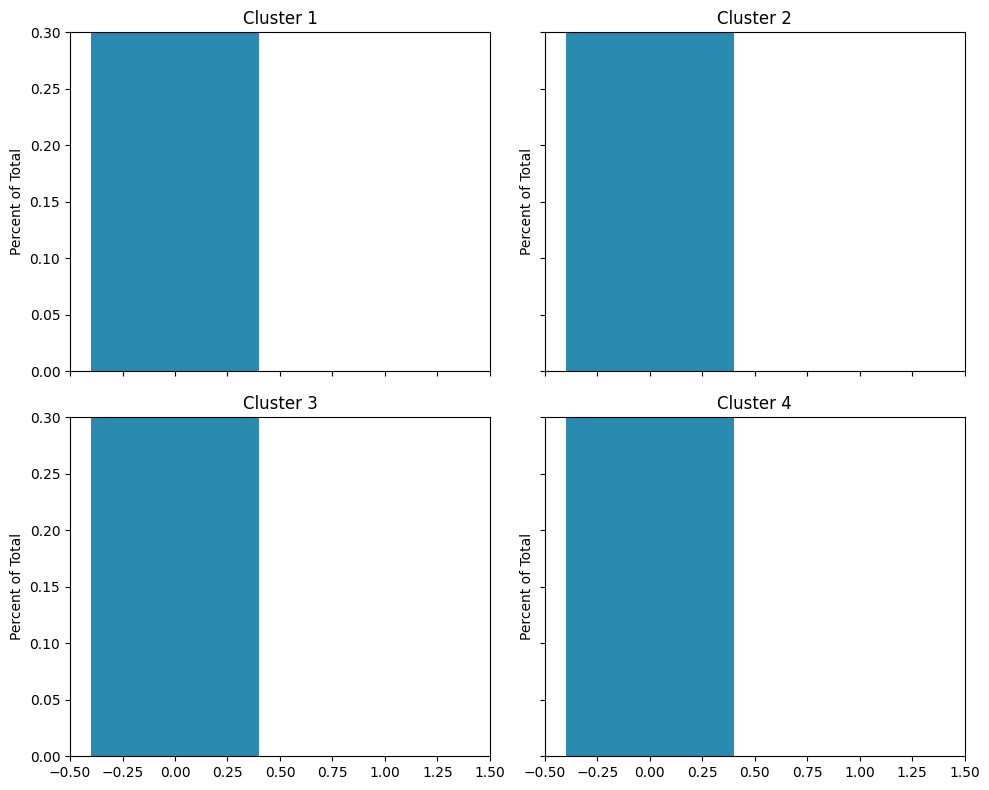

In [18]:
# Number of features (excluding the Cluster column)
num_features = MD_x.shape[1] - 1  # Exclude the cluster column

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex=True, sharey=True)

# Titles for each subplot
cluster_titles = ["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"]

# Loop through each cluster
for cluster in range(4):
    cluster_data = MD_x[MD_x['Cluster'] == cluster]
    ax = axes[cluster // 2, cluster % 2]  # Access subplot by row and column
    # Plot histogram for each feature
    for col in MD_x.columns[:-1]:  # Exclude the cluster column
        ax.hist(cluster_data[col], bins=np.arange(-0.5, 1.5, 1), align='mid', rwidth=0.8, alpha=0.7, label=col, density=True)
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(0, 0.3)  # Adjust as needed based on your data
    ax.set_title(cluster_titles[cluster])
    ax.set_ylabel('Percent of Total')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [19]:
# Set random seed for reproducibility
np.random.seed(1234)

# Perform K-means clustering for 2 to 8 clusters
kmeans_models = {}
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    MD_x[f'Cluster_{k}'] = kmeans.fit_predict(MD_x)
    kmeans_models[k] = kmeans

In [20]:
# Select the four-segment solution
MD_k4 = kmeans_models[4]
MD_x['Cluster_4'] = MD_k4.labels_


In [21]:
def calculate_segment_stability(data, kmeans_model, n_boot=100, n_init=10):
    stability = []
    n_clusters = kmeans_model.n_clusters

    for cluster in range(n_clusters):
        cluster_stability = []
        original_labels = data[f'Cluster_{n_clusters}']

        for _ in range(n_boot):
            sample_data = resample(data, n_samples=len(data), random_state=np.random.randint(0, 10000))
            sample_kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=1234)
            sample_labels = sample_kmeans.fit_predict(sample_data)
            ari_score = adjusted_rand_score(original_labels, sample_labels)
            cluster_stability.append(ari_score)

        stability.append(np.mean(cluster_stability))

    return stability

# Calculate stability for the four-segment solution
MD_r4 = calculate_segment_stability(MD_x, MD_k4)


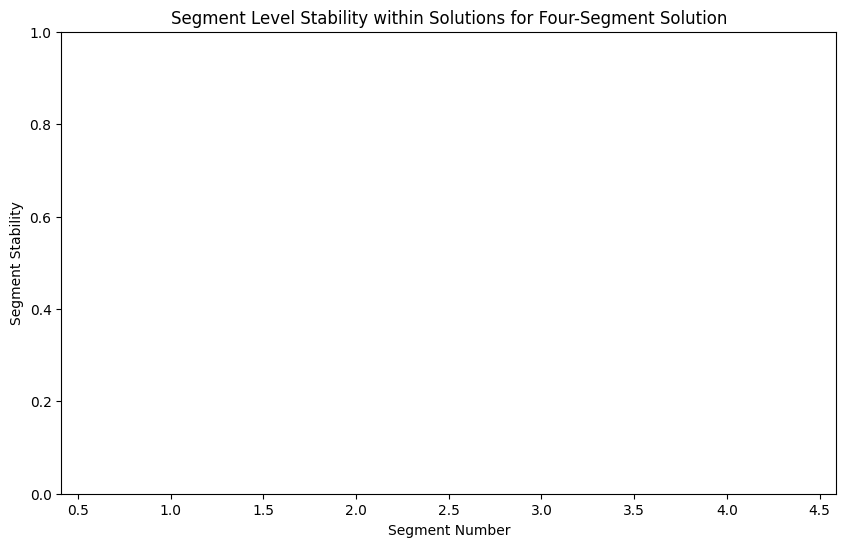

In [24]:
# Plot the stability
segment_numbers = range(1, len(MD_r4) + 1)

plt.figure(figsize=(10, 6))
plt.bar(segment_numbers, MD_r4)
plt.ylim(0, 1)
plt.xlabel('Segment Number')
plt.ylabel('Segment Stability')
plt.title('Segment Level Stability within Solutions for Four-Segment Solution')
plt.show()

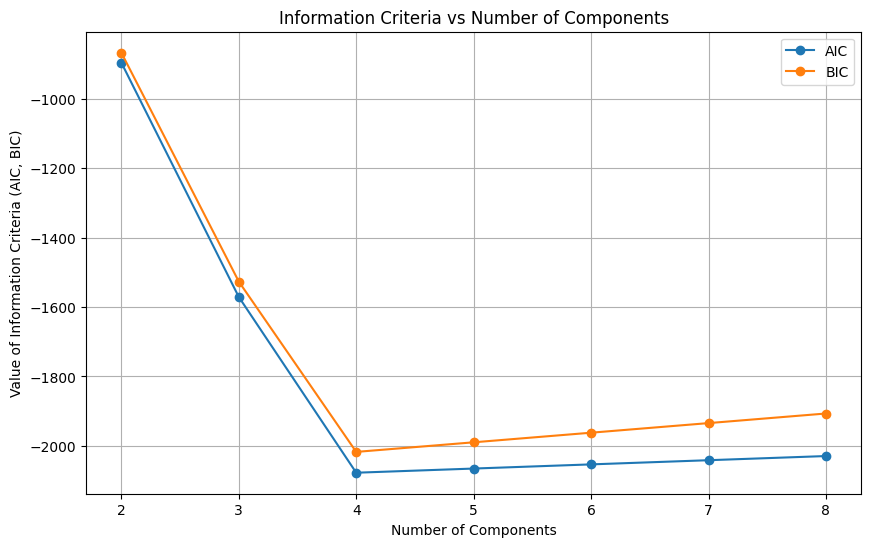

Best number of components based on BIC: 4
GMM      0   1   2   3
KMeans                
0       24   0   0   0
1        0  34   0   0
2        0   0  23   0
3        0   0   0  19


In [23]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

# Seed for reproducibility
np.random.seed(1234)

# Generate synthetic binary data (replace with actual data)
n_samples = 100
n_features = 2
X = np.random.randint(0, 2, size=(n_samples, n_features))

# Fit Gaussian Mixture Models with k from 2 to 8
results = []
for k in range(2, 9):
    gmm = GaussianMixture(n_components=k, n_init=10, random_state=1234)
    gmm.fit(X)

    # Calculate AIC and BIC
    aic_score = gmm.aic(X)
    bic_score = gmm.bic(X)

    results.append({
        'k': k,
        'AIC': aic_score,
        'BIC': bic_score
    })

results_df = pd.DataFrame(results)

# Plot the information criteria
plt.figure(figsize=(10, 6))
plt.plot(results_df['k'], results_df['AIC'], marker='o', label='AIC')
plt.plot(results_df['k'], results_df['BIC'], marker='o', label='BIC')
plt.xlabel('Number of Components')
plt.ylabel('Value of Information Criteria (AIC, BIC)')
plt.title('Information Criteria vs Number of Components')
plt.legend()
plt.grid(True)
plt.show()

# Select a suitable number of segments (e.g., based on BIC or ICL)
best_k = results_df.loc[results_df['BIC'].idxmin(), 'k']
print(f"Best number of components based on BIC: {best_k}")

# Fit k-means for comparison
kmeans = KMeans(n_clusters=best_k, random_state=1234)
kmeans_clusters = kmeans.fit_predict(X)

# Fit the chosen Gaussian Mixture Model
gmm_best = GaussianMixture(n_components=best_k, n_init=10, random_state=1234)
gmm_best.fit(X)
gmm_clusters = gmm_best.predict(X)

# Cross-tabulation of clusters
comparison = pd.crosstab(kmeans_clusters, gmm_clusters, rownames=['KMeans'], colnames=['GMM'])
print(comparison)

In [34]:
from sklearn.cluster import KMeans

# Assuming MD_x is already defined and preprocessed as shown before
n_clusters = 4  # Number of clusters for k-means
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
kmeans_clusters = kmeans.fit_predict(MD_x)

# Add the cluster assignments to the data
MD_x['kmeans_cluster'] = kmeans_clusters


In [35]:
from scipy.stats import bernoulli
from sklearn.mixture import BayesianGaussianMixture

class BernoulliMixtureModel:
    def __init__(self, n_components, n_init=10, max_iter=100):
        self.n_components = n_components
        self.n_init = n_init
        self.max_iter = max_iter
        self.models = [BayesianGaussianMixture(n_components=self.n_components,
                                               covariance_type='diag',
                                               max_iter=self.max_iter,
                                               n_init=self.n_init,
                                               random_state=1234)
                       for _ in range(self.n_init)]

    def fit(self, X):
        best_model = None
        best_score = -np.inf
        for model in self.models:
            model.fit(X)
            score = model.lower_bound_
            if score > best_score:
                best_score = score
                best_model = model
        self.model = best_model

    def predict(self, X):
        return self.model.predict(X)

# Fit the Bernoulli Mixture Model
mixture_model = BernoulliMixtureModel(n_components=n_clusters, n_init=10, max_iter=100)
mixture_model.fit(MD_x.drop('kmeans_cluster', axis=1))

# Predict the mixture model components
mixture_components = mixture_model.predict(MD_x.drop('kmeans_cluster', axis=1))

# Add the component assignments to the data
MD_x['mixture_component'] = mixture_components


In [36]:
# Assuming MD_x is already defined and preprocessed as shown before
n_clusters = 4  # Number of clusters for k-means
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
kmeans_clusters = kmeans.fit_predict(MD_x)

# Add the cluster assignments to the data
MD_x['kmeans_cluster'] = kmeans_clusters


In [37]:
from sklearn.mixture import BayesianGaussianMixture

# Fit the Bernoulli Mixture Model without initialization
mixture_model = BayesianGaussianMixture(n_components=n_clusters, covariance_type='diag', max_iter=100, random_state=1234)
mixture_model.fit(MD_x.drop('kmeans_cluster', axis=1))

# Log-likelihood for mixture model without initialization
log_likelihood_without_init = mixture_model.lower_bound_
print('Log Likelihood without initialization:', log_likelihood_without_init)

# Fit the Bernoulli Mixture Model with initialization using k-means cluster assignments
initial_labels = kmeans_clusters
mixture_model_initialized = BayesianGaussianMixture(n_components=n_clusters, covariance_type='diag', max_iter=100, random_state=1234)
mixture_model_initialized.fit(MD_x.drop('kmeans_cluster', axis=1), y=initial_labels)

# Log-likelihood for mixture model with initialization
log_likelihood_with_init = mixture_model_initialized.lower_bound_
print('Log Likelihood with initialization:', log_likelihood_with_init)


Log Likelihood without initialization: 14096.541549362131
Log Likelihood with initialization: 14096.541549362131


In [39]:
import pandas as pd

# Sample data
data = {
    'Like': ['I LOVE IT!', 'I LIKE IT', "I DON'T LIKE IT", 'I HATE IT!'] * 10  # Example data
}
mcdonalds = pd.DataFrame(data)

# Define the mapping for the ordinal levels
like_mapping = {
    'I LOVE IT!': 1,
    'I LIKE IT': 2,
    "I DON'T LIKE IT": 3,
    'I HATE IT!': 4
}

# Convert 'Like' to a numeric variable
mcdonalds['Like_numeric'] = mcdonalds['Like'].map(like_mapping)

# Transform the numeric variable to the required scale
mcdonalds['Like_transformed'] = 6 - mcdonalds['Like_numeric']

print(mcdonalds['Like_transformed'].value_counts())


Like_transformed
5    10
4    10
3    10
2    10
Name: count, dtype: int64


In [40]:
import statsmodels.api as sm
from sklearn.mixture import GaussianMixture


# Example independent variables (perceptions of McDonald's)
independent_vars = ['perception1', 'perception2', 'perception3']  # replace with your actual variable names
mcdonalds[independent_vars] = np.random.rand(len(mcdonalds), len(independent_vars))  # Example data

# Prepare the model formula
formula = 'Like_transformed ~ ' + ' + '.join(independent_vars)

# Fit the regression model
# First, prepare the design matrix
X = mcdonalds[independent_vars]
X = sm.add_constant(X)  # add constant for intercept
y = mcdonalds['Like_transformed']

# Fit the model
model = sm.OLS(y, X).fit()
print(model.summary())

# Fit a Gaussian Mixture Model for segmentation
gmm = GaussianMixture(n_components=3, random_state=0)  # Number of components (segments)
gmm.fit(X)
mcdonalds['Segment'] = gmm.predict(X)

print(mcdonalds[['Like_transformed', 'Segment']].head())


                            OLS Regression Results                            
Dep. Variable:       Like_transformed   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.044
Date:                Fri, 02 Aug 2024   Prob (F-statistic):              0.385
Time:                        14:04:39   Log-Likelihood:                -59.552
No. Observations:                  40   AIC:                             127.1
Df Residuals:                      36   BIC:                             133.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.0204      0.571      7.044      

In [43]:
from sklearn.linear_model import LinearRegression
# Prepare and fit linear regression models for each segment
segments = mcdonalds['Segment'].unique()
models = {}

for segment in segments:
    segment_data = mcdonalds[mcdonalds['Segment'] == segment]
    X_segment = segment_data[['perception1', 'perception2', 'perception3']]
    y_segment = segment_data['Like_transformed']

    model = LinearRegression()
    model.fit(X_segment, y_segment)
    models[segment] = model

# Print out the coefficients for each segment
for segment, model in models.items():
    print(f"Segment {segment} coefficients: {model.coef_}, intercept: {model.intercept_}")


Segment 0 coefficients: [-0.01456466 -4.3195839  11.77389994], intercept: -1.8198222209158632
Segment 1 coefficients: [-1.06594904 -0.21214768 -0.25672036], intercept: 4.1986290154096775
Segment 2 coefficients: [-2.17654809 -2.32161824 -2.85529913], intercept: 8.365886614357988


In [44]:
import statsmodels.api as sm

# Prepare to fit linear regression models for each segment
segment_models = {}

for segment in segments:
    segment_data = mcdonalds[mcdonalds['Segment'] == segment]
    X_segment = segment_data[['perception1', 'perception2', 'perception3']]
    y_segment = segment_data['Like_transformed']

    # Add a constant term for the intercept
    X_segment = sm.add_constant(X_segment)

    # Fit the linear regression model
    model = sm.OLS(y_segment, X_segment).fit()
    segment_models[segment] = model

# Summarize the results for each segment
for segment, model in segment_models.items():
    print(f"Segment {segment} summary:")
    print(model.summary())
    print("\n")



Segment 0 summary:
                            OLS Regression Results                            
Dep. Variable:       Like_transformed   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     8.107
Date:                Fri, 02 Aug 2024   Prob (F-statistic):            0.00827
Time:                        14:27:13   Log-Likelihood:                -8.9742
No. Observations:                  12   AIC:                             25.95
Df Residuals:                       8   BIC:                             27.89
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.8198      1.8

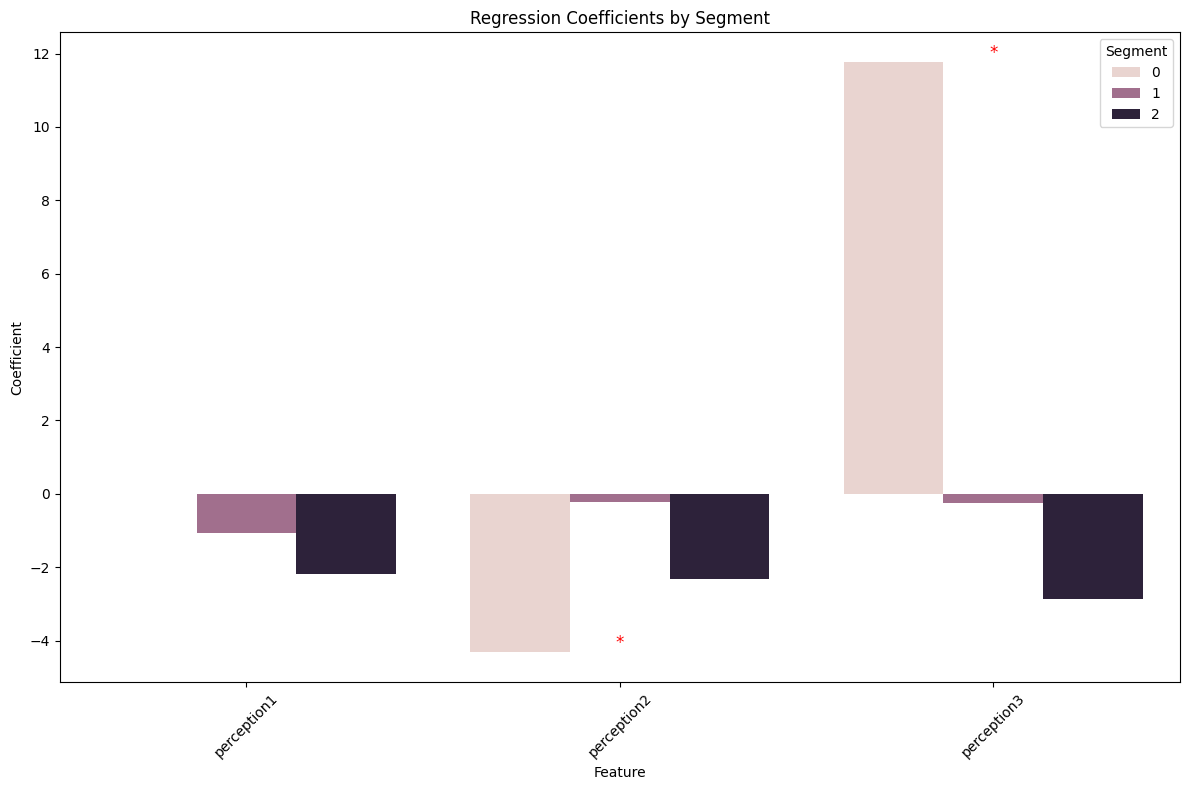

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting
coefficients = []
significance = []

for segment, model in segment_models.items():
    # Extract coefficients
    coefs = model.params
    p_values = model.pvalues

    # Prepare data for each coefficient
    for feature, coef in coefs.items():
        if feature != 'const':  # Exclude intercept from plotting
            coefficients.append({
                'Segment': segment,
                'Feature': feature,
                'Coefficient': coef,
                'Significance': p_values[feature] < 0.05  # Significance threshold
            })

# Create a DataFrame for plotting
coeff_df = pd.DataFrame(coefficients)

# Plot the coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Feature', y='Coefficient', hue='Segment', data=coeff_df, dodge=True)

# Add significance shading
for i, row in coeff_df.iterrows():
    plt.text(i, row['Coefficient'], '*' if row['Significance'] else '',
             color='red', ha='center', va='bottom', fontsize=12)

plt.title('Regression Coefficients by Segment')
plt.xticks(rotation=45)
plt.ylabel('Coefficient')
plt.xlabel('Feature')
plt.legend(title='Segment')
plt.tight_layout()
plt.show()


In [46]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Example data setup
np.random.seed(1234)
data = np.random.rand(10, 5)  # 10 observations, 5 features
df = pd.DataFrame(data, columns=[f'Feature_{i}' for i in range(1, 6)])


In [47]:
# Transpose the data matrix
data_transposed = df.T

# Compute the distance matrix
dist_matrix = pdist(data_transposed, metric='euclidean')  # Euclidean distance
dist_matrix = squareform(dist_matrix)


In [48]:
# Perform hierarchical clustering
linkage_matrix = linkage(dist_matrix, method='ward')  # You can choose different methods like 'single', 'complete', 'average', 'ward'


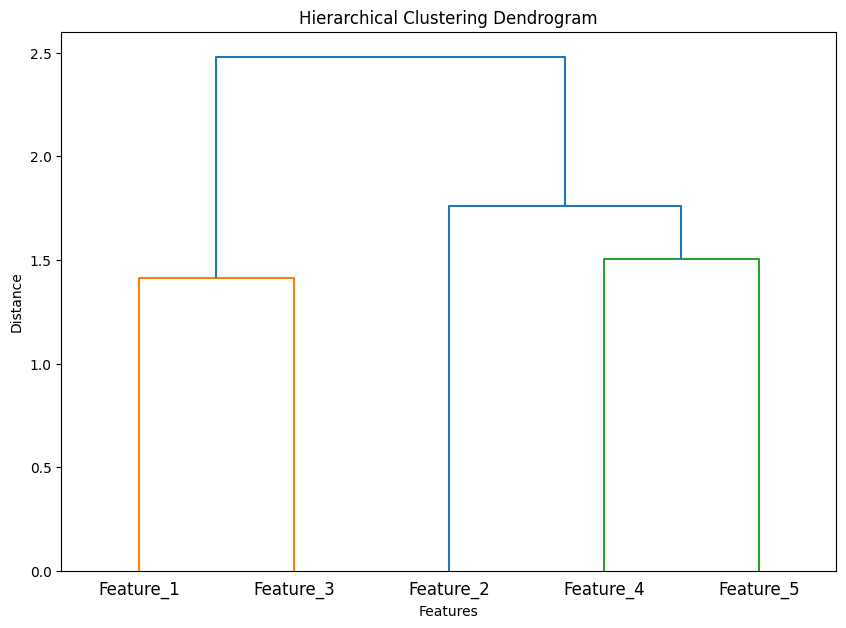

In [49]:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=df.columns, orientation='top')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()


In [50]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Example data setup
np.random.seed(1234)
data = np.random.rand(10, 5)  # 10 observations, 5 features
df = pd.DataFrame(data, columns=[f'Feature_{i}' for i in range(1, 6)])

# Transpose data for clustering features (not observations)
data_transposed = df.T

# Compute distance matrix and hierarchical clustering
dist_matrix = pdist(data_transposed, metric='euclidean')
linkage_matrix = linkage(dist_matrix, method='ward')

# Get the order of features based on hierarchical clustering
dendro = dendrogram(linkage_matrix, no_plot=True)
ordered_features = [df.columns[i] for i in dendro['leaves']]


In [51]:
# Reorder columns of df based on the hierarchical clustering order
df_ordered = df[ordered_features]

# Calculate percentages for each segment
df_ordered['Segment'] = np.random.choice([1, 2, 3, 4], df_ordered.shape[0])
percentages = df_ordered.groupby('Segment').mean()
percentages = percentages.apply(lambda x: x / x.sum(), axis=1)
percentages = percentages * 100


In [53]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Example data setup
np.random.seed(1234)
data = np.random.rand(100, 5)  # 100 observations, 5 features
df = pd.DataFrame(data, columns=[f'Feature_{i}' for i in range(1, 6)])
df['Segment'] = np.random.choice([1, 2, 3, 4], 100)  # Segment assignments

# Standardize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop('Segment', axis=1))

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['Segment'] = df['Segment']


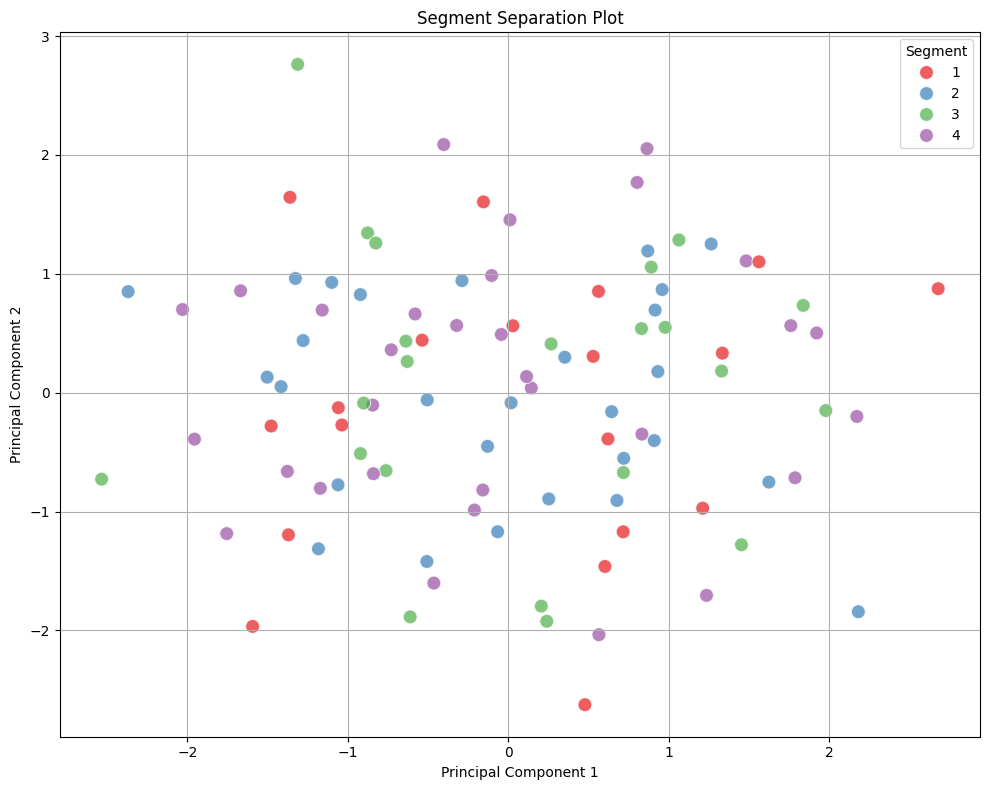

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the PCA result
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Segment', data=pca_df, palette='Set1', s=100, alpha=0.7)

# Customize the plot
plt.title('Segment Separation Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Segment')
plt.grid(True)
plt.tight_layout()
plt.show()


In [58]:


# Example data setup
np.random.seed(1234)
data = np.random.rand(100, 5)  # 100 observations, 5 features
df = pd.DataFrame(data, columns=[f'Feature_{i}' for i in range(1, 6)])
df['Segment'] = np.random.choice([1, 2, 3, 4], 100)  # Segment assignments
df['Like'] = np.random.randint(1, 12, 100)  # Ordinal variable 1 to 11

# Convert 'Like' to numeric as described earlier
df['Like_numeric'] = 6 - df['Like']

# Cross-tabulate segment membership and the love/hate variable
contingency_table = pd.crosstab(df['Segment'], df['Like_numeric'])


In [59]:
# Calculate expected frequencies
total = contingency_table.sum().sum()
row_totals = contingency_table.sum(axis=1)
col_totals = contingency_table.sum(axis=0)
expected = np.outer(row_totals, col_totals) / total
observed = contingency_table.values

# Calculate deviations from expected
deviation = observed - expected


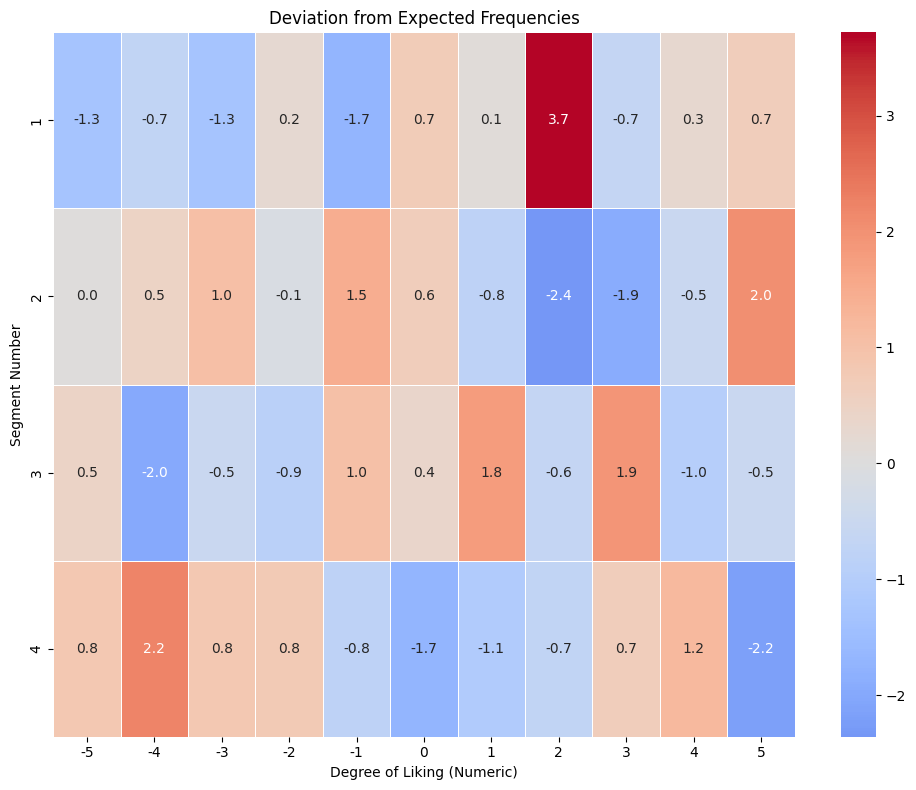

In [60]:

# Create a DataFrame for the deviations
deviation_df = pd.DataFrame(deviation, index=contingency_table.index, columns=contingency_table.columns)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(deviation_df, annot=True, cmap='coolwarm', center=0, cbar=True, fmt='.1f', linewidths=0.5)

# Customize the plot
plt.title('Deviation from Expected Frequencies')
plt.xlabel('Degree of Liking (Numeric)')
plt.ylabel('Segment Number')
plt.tight_layout()
plt.show()


In [61]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Example data setup
np.random.seed(1234)
data = np.random.rand(100, 5)  # 100 observations, 5 features
df = pd.DataFrame(data, columns=[f'Feature_{i}' for i in range(1, 6)])
df['Segment'] = np.random.choice([1, 2, 3, 4], 100)  # Segment assignments
df['Like'] = np.random.randint(1, 12, 100)  # Ordinal variable 1 to 11
df['Age'] = np.random.randint(18, 65, 100)
df['VisitFrequency'] = np.random.randint(1, 10, 100)
df['Gender'] = np.random.choice(['Male', 'Female'], 100)

# Convert 'Like' to numeric
df['Like_numeric'] = 6 - df['Like']

# Encode categorical variables
label_encoders = {}
for column in ['Gender']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define features and target variable
X = df[['Like_numeric', 'Age', 'VisitFrequency', 'Gender']]
y = (df['Segment'] == 3).astype(int)  # Target: 1 if Segment == 3, else 0

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

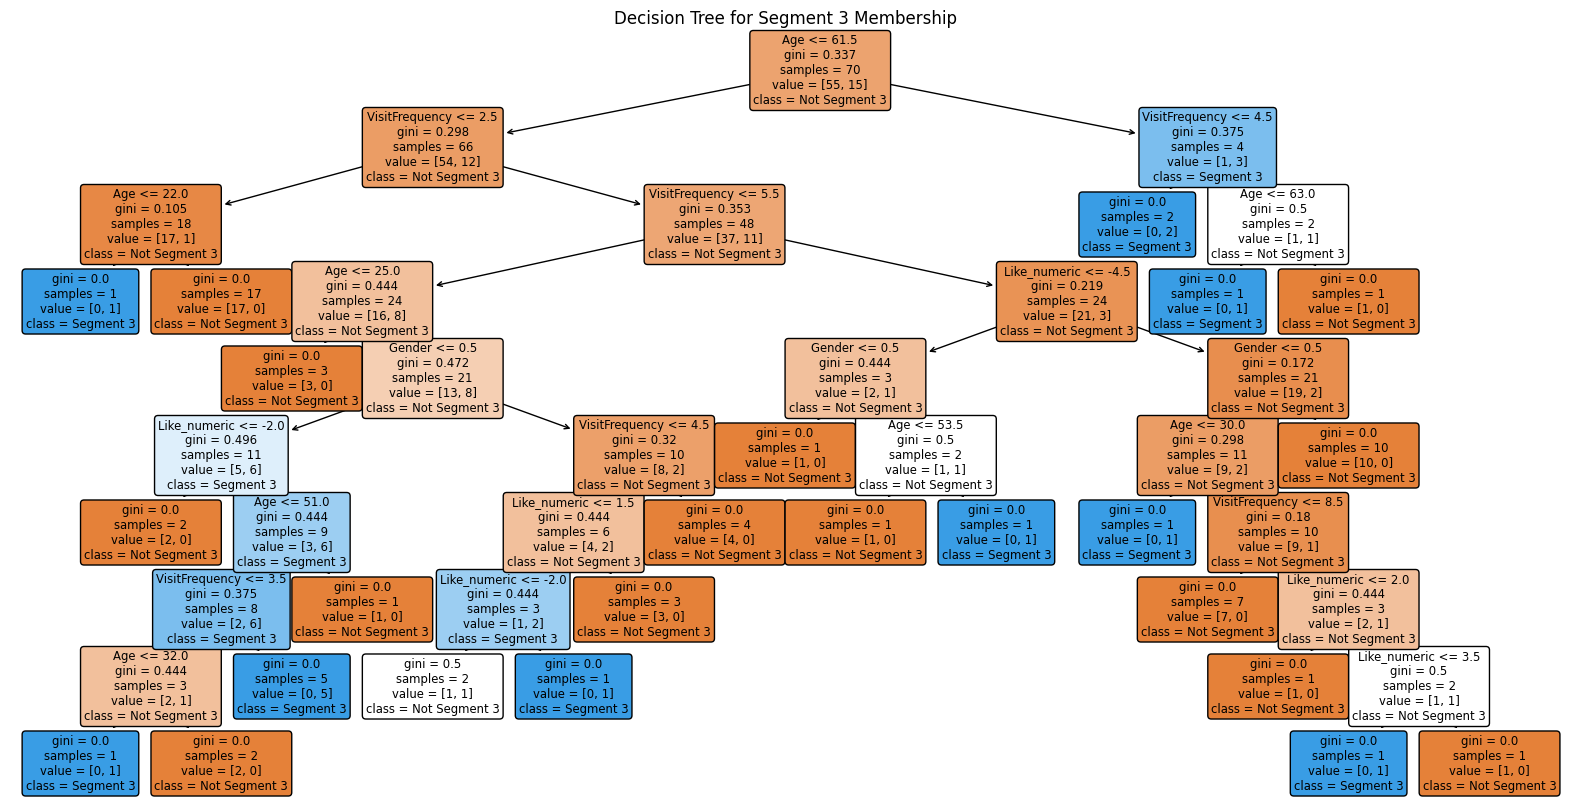

In [62]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Fit the decision tree model
tree = DecisionTreeClassifier(random_state=1234)
tree.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, class_names=['Not Segment 3', 'Segment 3'], filled=True, rounded=True)
plt.title('Decision Tree for Segment 3 Membership')
plt.show()


In [63]:
# Example data setup
np.random.seed(1234)
data = np.random.rand(100, 5)  # 100 observations, 5 features
df = pd.DataFrame(data, columns=[f'Feature_{i}' for i in range(1, 6)])
df['Segment'] = np.random.choice([1, 2, 3, 4], 100)  # Segment assignments
df['VisitFrequency'] = np.random.randint(1, 10, 100)

# Display the first few rows to confirm the data
print(df.head())

   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Segment  \
0   0.191519   0.622109   0.437728   0.785359   0.779976        2   
1   0.272593   0.276464   0.801872   0.958139   0.875933        2   
2   0.357817   0.500995   0.683463   0.712702   0.370251        4   
3   0.561196   0.503083   0.013768   0.772827   0.882641        3   
4   0.364886   0.615396   0.075381   0.368824   0.933140        2   

   VisitFrequency  
0               3  
1               6  
2               6  
3               5  
4               7  


In [64]:
# Calculate mean visit frequency by segment
visit_means = df.groupby('Segment')['VisitFrequency'].mean()

# Display the result
print(visit_means)


Segment
1    4.000000
2    4.321429
3    4.727273
4    5.354839
Name: VisitFrequency, dtype: float64


In [65]:
# Example data setup
np.random.seed(1234)
data = np.random.rand(100, 5)  # 100 observations, 5 features
df = pd.DataFrame(data, columns=[f'Feature_{i}' for i in range(1, 6)])
df['Segment'] = np.random.choice([1, 2, 3, 4], 100)  # Segment assignments
df['Like'] = np.random.randint(1, 12, 100)  # Ordinal variable 1 to 11

# Convert 'Like' to numeric
df['Like_numeric'] = 6 - df['Like']

# Display the first few rows to confirm the data
print(df.head())


   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Segment  Like  \
0   0.191519   0.622109   0.437728   0.785359   0.779976        2     3   
1   0.272593   0.276464   0.801872   0.958139   0.875933        2     6   
2   0.357817   0.500995   0.683463   0.712702   0.370251        4    10   
3   0.561196   0.503083   0.013768   0.772827   0.882641        3     6   
4   0.364886   0.615396   0.075381   0.368824   0.933140        2     5   

   Like_numeric  
0             3  
1             0  
2            -4  
3             0  
4             1  


In [66]:
# Calculate mean 'Like_numeric' by segment
like_means = df.groupby('Segment')['Like_numeric'].mean()

# Display the result
print(like_means)


Segment
1    1.684211
2    0.035714
3    0.727273
4   -0.354839
Name: Like_numeric, dtype: float64


In [67]:
df['Segment'] = np.random.choice([1, 2, 3, 4], 100)  # Segment assignments
df['Gender'] = np.random.choice(['Male', 'Female'], 100)

# Convert 'Gender' to binary (0 for Male, 1 for Female)
df['Gender_binary'] = (df['Gender'] == 'Female').astype(int)

# Display the first few rows to confirm the data
print(df.head())

   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Segment  Like  \
0   0.191519   0.622109   0.437728   0.785359   0.779976        2     3   
1   0.272593   0.276464   0.801872   0.958139   0.875933        2     6   
2   0.357817   0.500995   0.683463   0.712702   0.370251        3    10   
3   0.561196   0.503083   0.013768   0.772827   0.882641        1     6   
4   0.364886   0.615396   0.075381   0.368824   0.933140        4     5   

   Like_numeric  Gender  Gender_binary  
0             3  Female              1  
1             0    Male              0  
2            -4  Female              1  
3             0  Female              1  
4             1    Male              0  


In [68]:
# Calculate mean proportion of females by segment
female_proportion = df.groupby('Segment')['Gender_binary'].mean()

# Display the result
print(female_proportion)


Segment
1    0.580645
2    0.555556
3    0.800000
4    0.380952
Name: Gender_binary, dtype: float64


In [69]:
df['Segment'] = np.random.choice([1, 2, 3, 4], 100)  # Segment assignments
df['VisitFrequency'] = np.random.randint(1, 10, 100)
df['Like_numeric'] = 6 - np.random.randint(1, 12, 100)
df['Gender'] = np.random.choice(['Male', 'Female'], 100)
df['Gender_binary'] = (df['Gender'] == 'Female').astype(int)

# Calculate means
visit = df.groupby('Segment')['VisitFrequency'].mean()
like = df.groupby('Segment')['Like_numeric'].mean()
female_proportion = df.groupby('Segment')['Gender_binary'].mean()

# Prepare data for plotting
segments = visit.index
visit = visit.values
like = like.values
female_proportion = female_proportion.values

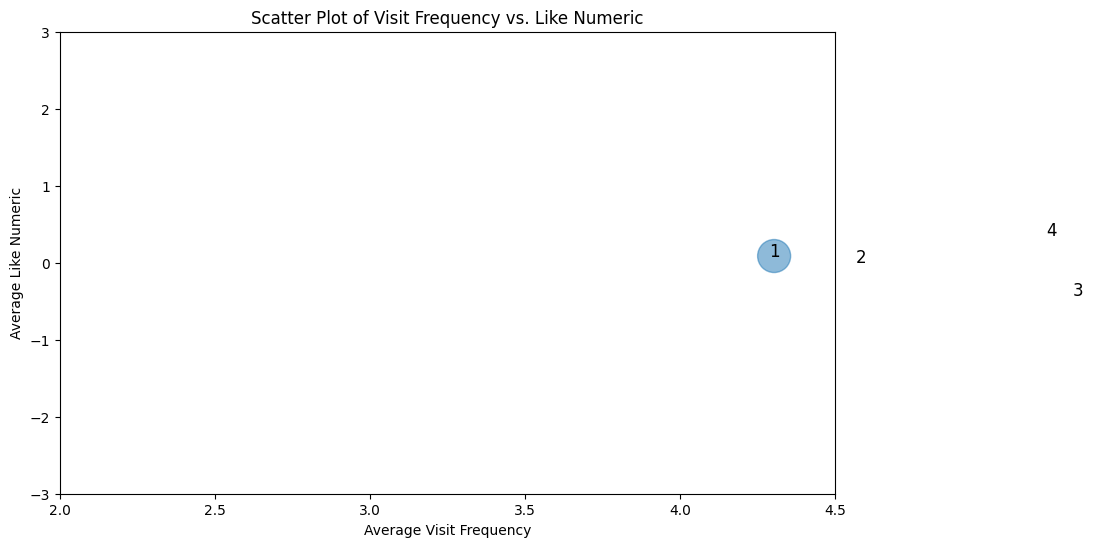

In [70]:
plt.figure(figsize=(10, 6))

# Create scatter plot
plt.scatter(visit, like, s=10 * female_proportion * 100, alpha=0.5)

# Add text labels
for i, segment in enumerate(segments):
    plt.text(visit[i], like[i], str(segment), fontsize=12, ha='center')

# Set plot limits
plt.xlim(2, 4.5)
plt.ylim(-3, 3)

# Add labels and title
plt.xlabel('Average Visit Frequency')
plt.ylabel('Average Like Numeric')
plt.title('Scatter Plot of Visit Frequency vs. Like Numeric')

plt.show()